# Memoria resumen con todo

La memoria presenta de manera resumida y concisa todo el código previamente explicado, desde el análisis hasta la predicción. En este cuadernillo, se puede observar el proceso completo de Machine Learning, detallado paso a paso de forma simplificada. La memoria no se limita solo a líneas de código, sino que también incluye texto en formato Markdown, donde se explican las ideas principales, las conclusiones obtenidas y los motivos detrás de las decisiones tomadas a lo largo del proceso.

## Librerías

In [18]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Estadística 
import scipy

import warnings

# Modelos de predicción
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


## Carga de datos

In [2]:
df = pd.read_csv(r'C:\Users\nuria\OneDrive\Escritorio\ML_student_depression\data\raw\Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


#### Resumen de observaciones del Análisis Exploratorio
- El conjunto de datos se compone de 18 columnas (variables) y 27901 filas
- Utiliza un espacio de memoria de 3.5+ MB
- Solo hay valores nulos en 'Financial Stress'
- No hay valores duplicados
- No hay datos faltantes
- Hay algunos tipos de dato que probablemente tenga que cambiar
- No hay jerarquías o estructuras anidadas

In [3]:
# Limpieza y procesado de datos
eliminar = ['id', 'Profession', 'Work Pressure', 'Job Satisfaction']
df = df.drop(columns=eliminar) 

encode = LabelEncoder()
df_categorical =[]
for column in df.columns:
    if df[column].dtypes=="object":
        df_categorical.append(column)
for column in df_categorical: 
    df[column] = encode.fit_transform(df[column])

df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,5.0,8.97,2.0,0,0,3,1,3.0,1.0,0,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,3.0,2.0,1,0
2,1,31.0,44,3.0,7.03,5.0,2,0,5,0,9.0,1.0,1,0
3,0,28.0,49,3.0,5.59,2.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,16,4.0,8.13,3.0,0,1,17,1,1.0,1.0,0,0


## Problema Machine Learning

Algoritmo supervisado

Se trata de un problema de **Clasificación binaria**: el target es la columna 'Depression', un conjunto de valores discretos. 
Dos opciones:
- Binaria: muestra depresión (1) o no la muestra (0)

## División en Train y Test y distrubución del target

In [4]:
X = df.drop('Depression', axis=1)
y = df['Depression']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Depression', axis=1),
                                                    df['Depression'],
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
# Imputación de datos faltantes con la moda
imputer = SimpleImputer(strategy='most_frequent')  # Imputar con la moda
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [7]:
from sklearn.preprocessing import StandardScaler

# Almaceno en el objeto scaler todo lo necesario para estandarizar, con los datos de train
scaler = StandardScaler()
scaler.fit(X_train)

# Utilizo los datos de train para escalar train y test.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Escalado de características
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

## Comprensión de variables

In [ ]:
# Variables y conclusiones en el notebook: 0_Análisis_exploratorio

In [9]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T
        
data_report(df)

COL_N,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
DATA_TYPE,int64,float64,int64,float64,float64,float64,int64,int64,int64,int64,float64,float64,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0
UNIQUE_VALUES,2,34,52,6,332,6,5,4,28,2,13,5,2,2
CARDIN (%),0.01,0.12,0.19,0.02,1.19,0.02,0.02,0.01,0.1,0.01,0.05,0.02,0.01,0.01


## Análisis  univariante y bivariante

In [ ]:
# Ambos aparecen en el Análisis exploratorio

## Duplicados

In [10]:
# Comprobamos que no tenga valores duplicados
df[df.duplicated(keep = False)] 

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


## Tratamiento de missings

In [13]:
print(df.isnull().sum())

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [11]:
# Imputar los valores nan a la mediana
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['Financial Stress'] = imputer.fit_transform(df[['Financial Stress']])
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,5.0,8.97,2.0,0,0,3,1,3.0,1.0,0,1
1,0,24.0,3,2.0,5.90,5.0,0,1,10,0,3.0,2.0,1,0
2,1,31.0,44,3.0,7.03,5.0,2,0,5,0,9.0,1.0,1,0
3,0,28.0,49,3.0,5.59,2.0,1,1,7,1,4.0,5.0,1,1
4,0,25.0,16,4.0,8.13,3.0,0,1,17,1,1.0,1.0,0,0


In [12]:
print(df.isnull().sum())

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


## Tratamiento de outliers

In [13]:
# Identificar los outliers usando el método IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcular la moda de la columna Age
mode_age = df['Age'].mode()[0]  # Obtenemos el primer valor de la moda

# Imputar los outliers a la moda
df['Age'] = df['Age'].apply(lambda x: mode_age if x < lower_bound or x > upper_bound else x)

In [14]:
# Calcular la media de la columna CGPA
mean_cgpa = df['CGPA'].mean()

'''Imputación de outliers de la columna CGPA a la media'''

# Imputar los outliers a la media
df['CGPA'] = df['CGPA'].apply(lambda x: mean_cgpa if x < lower_bound or x > upper_bound else x)

## Feature engineering
Transfromaciones, encodings, nuevas features y escalado

In [15]:
# One-Hot Encoding para crear columnas binarias a partir de la columna 'Degree'

df_one_hot = pd.get_dummies(df['Degree'], prefix='Degree')
df = pd.concat([df, df_one_hot], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Degree_18,Degree_19,Degree_20,Degree_21,Degree_22,Degree_23,Degree_24,Degree_25,Degree_26,Degree_27
0,1,33.0,51,5.0,8.970000,2.0,0,0,3,1,...,False,False,False,False,False,False,False,False,False,False
1,0,24.0,3,2.0,7.656104,5.0,0,1,10,0,...,False,False,False,False,False,False,False,False,False,False
2,1,31.0,44,3.0,7.656104,5.0,2,0,5,0,...,False,False,False,False,False,False,False,False,False,False
3,0,28.0,49,3.0,7.656104,2.0,1,1,7,1,...,False,False,False,False,False,False,False,False,False,False
4,0,25.0,16,4.0,8.130000,3.0,0,1,17,1,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df_onehot = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([df, df_onehot], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,Degree_20,Degree_21,Degree_22,Degree_23,Degree_24,Degree_25,Degree_26,Degree_27,Gender_0,Gender_1
0,1,33.0,51,5.0,8.970000,2.0,0,0,3,1,...,False,False,False,False,False,False,False,False,False,True
1,0,24.0,3,2.0,7.656104,5.0,0,1,10,0,...,False,False,False,False,False,False,False,False,True,False
2,1,31.0,44,3.0,7.656104,5.0,2,0,5,0,...,False,False,False,False,False,False,False,False,False,True
3,0,28.0,49,3.0,7.656104,2.0,1,1,7,1,...,False,False,False,False,False,False,False,False,True,False
4,0,25.0,16,4.0,8.130000,3.0,0,1,17,1,...,False,False,False,False,False,False,False,False,True,False


In [17]:
# Escalar datos con Min-max-scaler
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## Métrica del modelo
### Clasificación binaria
Se trata de un modelo de clasificación binaria porque su objetivo es predecir una de dos posibles clases. En este caso, el modelo debe determinar si una persona sufre de depresión o no, asignando a cada individuo una de las dos categorías: "sufre de depresión" (1) o "no sufre de depresión" (0). 
Este tipo de modelo se utiliza cuando la variable de salida tiene solo dos valores posibles, y el algoritmo aprende a clasificar las instancias en una de esas dos clases según las características de los datos de entrada proporcionados. 

## Decisión de modelos 
### Regresión Logística
Después de implementar distintos tipo de modelos de predicción, se determinó que el mejor modelo para este conjunto de datos fue la Regresión Logística, ya que alcanzó una precisión aproximada del 84,25%. 


In [19]:
# Entrenar un modelo (por ejemplo, Random Forest)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_test_pred = model.predict(X_test_scaled)
y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

## Resultados y error

Matriz de confusión:
[[1843  500]
 [ 412 2826]]

Reporte de clasificación:
              precision    recall  f1-score   support

No Depresión       0.82      0.79      0.80      2343
   Depresión       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



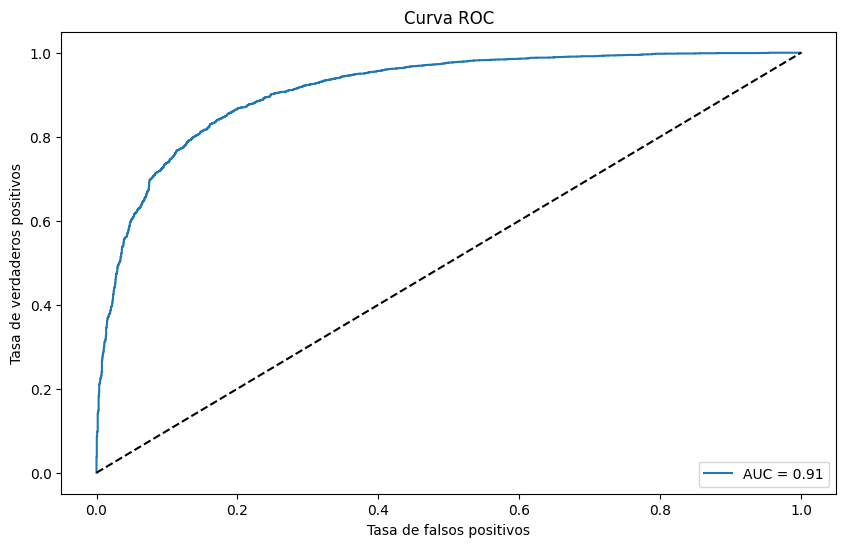

In [20]:
# 1. Métricas de rendimiento
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_test_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_test_pred, target_names=['No Depresión', 'Depresión']))

# 2. Calcular y mostrar el AUC-ROC
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

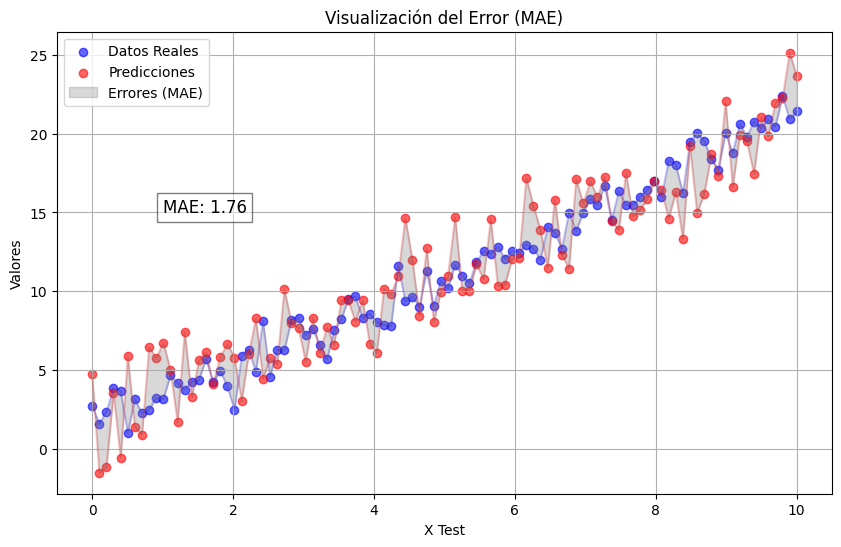

In [22]:
from sklearn.metrics import mean_absolute_error

# Simular datos para el ejemplo
np.random.seed(0)
x_test = np.linspace(0, 10, 100)
y_test = 2 * x_test + 1 + np.random.normal(0, 1, size=x_test.shape)  # Datos reales
y_pred = 2 * x_test + 1 + np.random.normal(0, 2, size=x_test.shape)  # Predicciones con error

mae = mean_absolute_error(y_test, y_pred)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Datos Reales', alpha=0.6)
plt.scatter(x_test, y_pred, color='red', label='Predicciones', alpha=0.6)
plt.plot(x_test, y_test, color='blue', alpha=0.2)
plt.plot(x_test, y_pred, color='red', alpha=0.2)
plt.fill_between(x_test, y_test, y_pred, color='gray', alpha=0.3, label='Errores (MAE)')

plt.text(1, 15, f'MAE: {mae:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Visualización del Error (MAE)')
plt.xlabel('X Test')
plt.ylabel('Valores')
plt.legend()
plt.grid()

plt.show()

### Conclusiones

El modelo que mejor puntuación obtuvo en el conjunto de prueba fue la Regresión Logística con un accuracy de 84.23%. Este modelo se ha entrenado con datos previamente limpios y se ha aplicado un método de validación cruzada para seleccionar los mejores parámetros. El clasificador con mayor accuracy es el Random Forest, con un accuracy de 84.23%. Además, se ha realizado una votación en varios clasificadores para obtener un clasificador más preciso.